# Data exploration of Individual Household Electric Power Consumption dataset



In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
raw_uci_data_relative_path = '../data/raw/uci/household_power_consumption.txt'

df=pd.read_csv(
    raw_uci_data_relative_path,
    sep=';',
    na_values=['?', ''],
    dtype={'Date': 'string', 'Time': 'string'}
)

df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


### Merging Date and Time columns

In [4]:
df['Datetime'] = pd.to_datetime(
    df['Date'] + ' ' + df['Time'],
    format='%d/%m/%Y %H:%M:%S',
    dayfirst=True
)

df.drop(columns=['Date', 'Time'], inplace=True)

df.dtypes

Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
Datetime                 datetime64[ns]
dtype: object

### Dealing with NaN values

In [5]:
df.isna().sum()

df['Datetime'].min(), df['Datetime'].max()

df[df.isna().any(axis=1) == True]

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
6839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-12-21 11:23:00
6840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-12-21 11:24:00
19724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-12-30 10:08:00
19725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-12-30 10:09:00
41832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-01-14 18:36:00
...,...,...,...,...,...,...,...,...
1990185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-09-28 19:09:00
1990186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-09-28 19:10:00
1990187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-09-28 19:11:00
1990188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-09-28 19:12:00


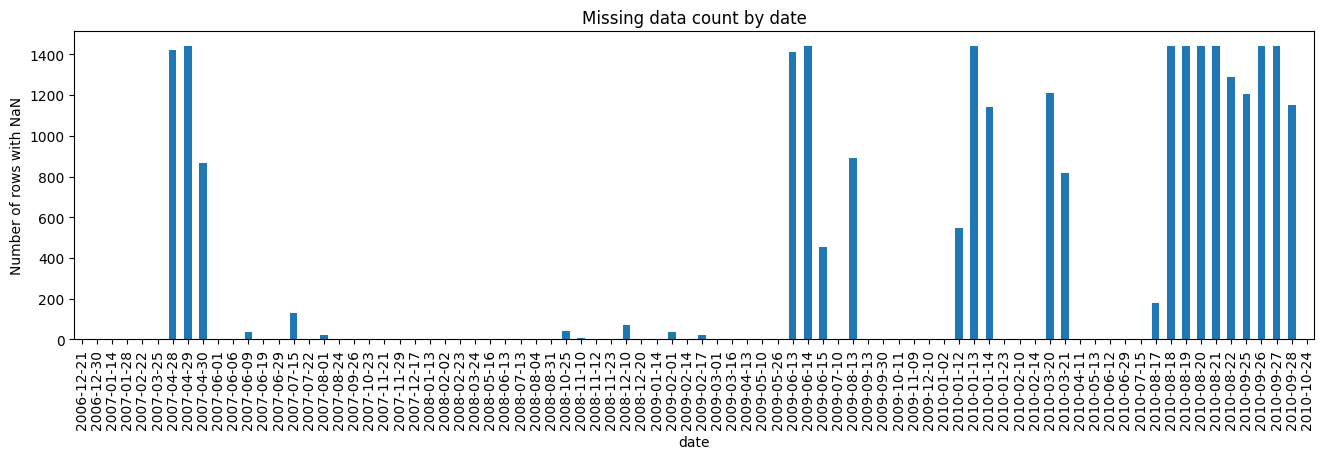

In [6]:
date_only = df['Datetime'].dt.date

missing_mask = df.isna().any(axis=1)

missing_per_date = df[missing_mask].groupby(date_only).size()

plt.figure(figsize=(16, 4))
missing_per_date.plot(kind='bar')
plt.xlabel('date')
plt.ylabel('Number of rows with NaN')
plt.title('Missing data count by date')
plt.show()

In [7]:
deletion_threshold = 50.0 # equal to 12 hours

date_only = df['Datetime'].dt.date

numeric_cols = [
    'Global_active_power',
    'Global_reactive_power',
    'Voltage',
    'Global_intensity',
    'Sub_metering_1',
    'Sub_metering_2',
    'Sub_metering_3',
]

missing_mask = df[numeric_cols].isna().any(axis=1)

# number of reading per one day
total_count_of_values = df.groupby(date_only).size()

missing_values = missing_mask.groupby(date_only).sum()

ratio_df = pd.DataFrame({
    'total_count_of_values': total_count_of_values,
    'missing_values': missing_values
})

ratio_df['ratio'] = (ratio_df['missing_values'] / ratio_df['total_count_of_values']) * 100

days_to_delete = ratio_df[ratio_df['ratio'] > 50.0].index

df = df[~date_only.isin(days_to_delete)].copy()

df[df.isna().any(axis=1) == True]

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
6839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-12-21 11:23:00
6840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-12-21 11:24:00
19724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-12-30 10:08:00
19725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-12-30 10:09:00
41832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-01-14 18:36:00
...,...,...,...,...,...,...,...,...
1929992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-08-17 23:56:00
1929993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-08-17 23:57:00
1929994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-08-17 23:58:00
1929995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-08-17 23:59:00


### Correlation matrix

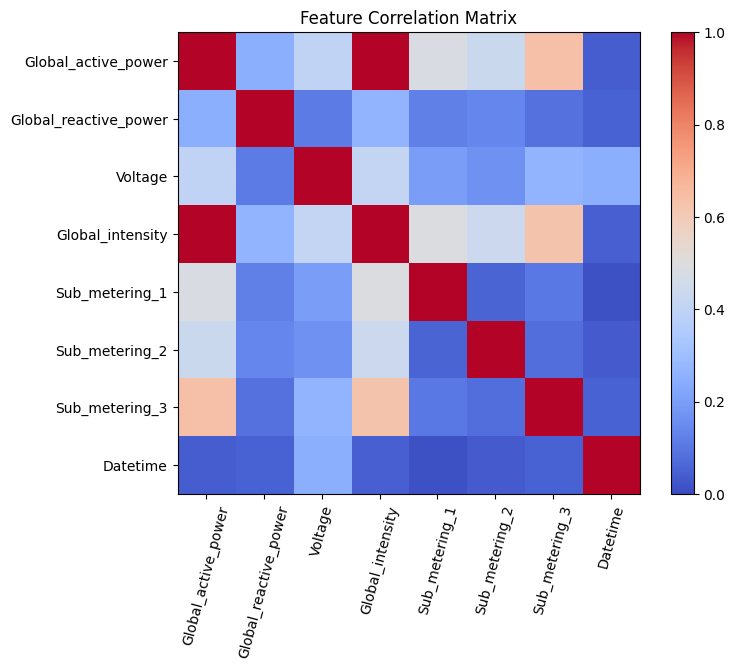

In [36]:
corr = df.corr().abs()

fig, ax = plt.subplots(figsize=(8,6))
im = ax.imshow(corr, cmap='coolwarm', vmin=0, vmax=1)
ax.set_xticks(range(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=75)
ax.set_yticks(range(len(corr.index)))
ax.set_yticklabels(corr.index)
fig.colorbar(im, ax=ax)
plt.title('Feature Correlation Matrix')
plt.show()

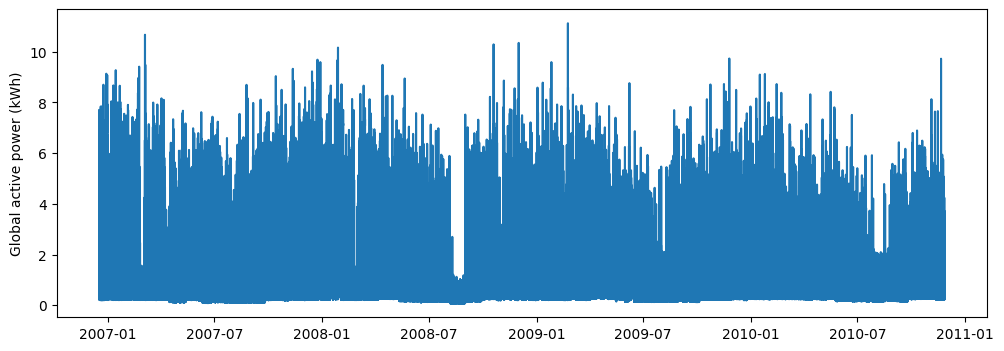

In [17]:
# Data visualisation
fig, ax = plt.subplots(figsize=(12, 4))
ax.set(ylabel='Global active power (kWh)')
ax.plot(df['Datetime'], df['Global_active_power'])
plt.show()

### Deleting multicollinearity
I chose `Global_itensity` as it is redundant, this is amp value that doesn't reflect usage of electrecity. Statistically it is also redundant as it has |r| = 1.0 with `Global_active_power`.

In [10]:
df_feats = df.drop(columns=['Global_intensity'])

### Creating useful date features

In [19]:
# Extracting more useful features
df_feats['hour'] = df_feats['Datetime'].dt.hour
df_feats['day_of_week'] = df['Datetime'].dt.weekday
df_feats['month'] = df['Datetime'].dt.month
df_feats['weekday'] = df_feats['day_of_week'] <= 5
df_feats['weekend'] = df_feats['day_of_week'] > 5

### Creating lag and rolling window features
Basic step of time-series analysis.

In [ ]:
# lag featues
df_feats['lag_1h'] = df_feats['Global_active_power'].shift(1)
df_feats['lag_2h'] = df_feats['Global_active_power'].shift(2)
df_feats['lag_3h'] = df_feats['Global_active_power'].shift(3)

#daily
df_feats['lag_24h'] = df_feats['Global_active_power'].shift(24)

#weekly
df_feats['lag_168h'] = df_feats['Global_active_power'].shift(168)

# rolling windows: 3h, 24h, 168h
for window in [3, 24, 168]:
    df[f'roll_mean_{window}h'] = (
        df['Global_active_power']
            .rolling(window=window)
            .mean()
            .shift(1)
    )

# empty rows cleanup
df_feats = df_feats.dropna().copy()

In [38]:
#corr = corr < 0.9
corr = df.corr().abs()
to_drop = [col for col in corr.columns if any(corr[col] > 0.9 and col != other)]

to_drop

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().